In [3]:
import pandas as pd
import numpy as np
customer_data = pd.read_csv('shopping_data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df_to_analyse=customer_data.iloc[:,3:5].values

In [7]:
df_to_analyse

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

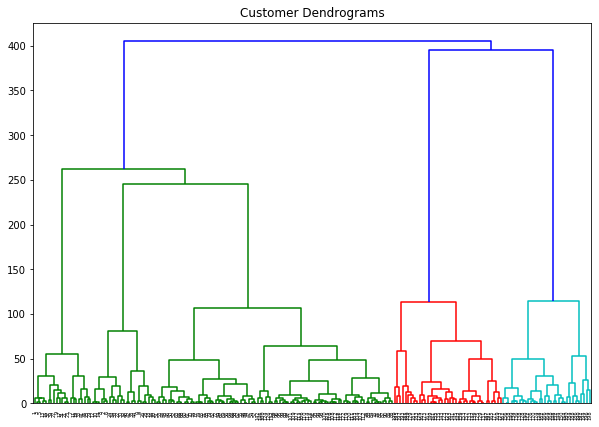

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Customer Dendrograms')
dend = shc.dendrogram(shc.linkage(df_to_analyse,method='ward'))


In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
cluster.fit_predict(df_to_analyse)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

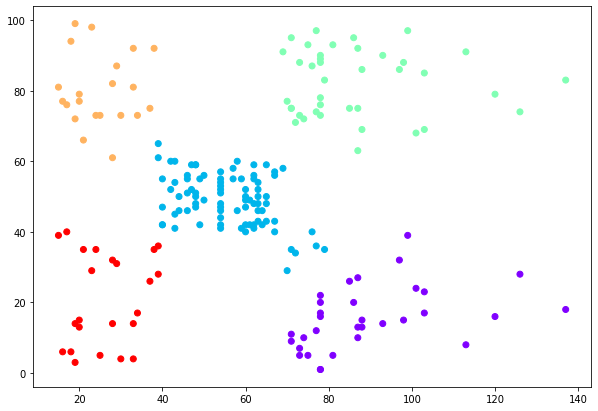

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(df_to_analyse[:,0], df_to_analyse[:,1], c=cluster.labels_, cmap='rainbow') 

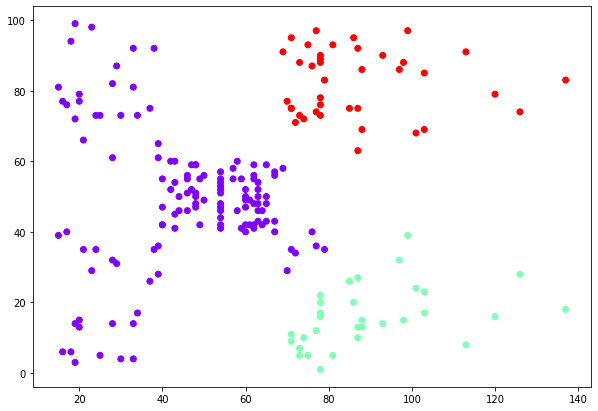

In [14]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(df_to_analyse)
plt.figure(figsize=(10, 7))
plt.scatter(df_to_analyse[:,0], df_to_analyse[':,1'], c=cluster.labels_, cmap='rainbow') 

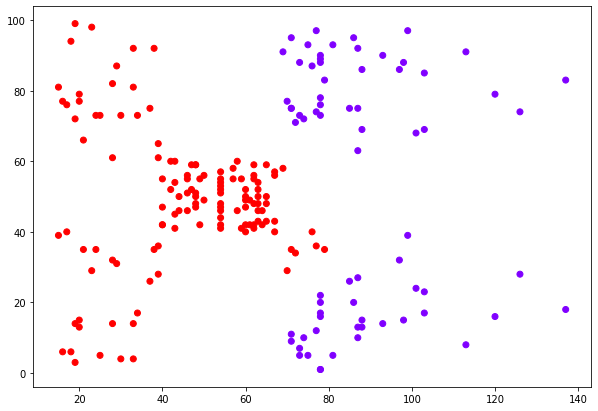

In [15]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster.fit_predict(df_to_analyse)
plt.figure(figsize=(10, 7))
plt.scatter(df_to_analyse[:,0], df_to_analyse[:,1], c=cluster.labels_, cmap='rainbow') 

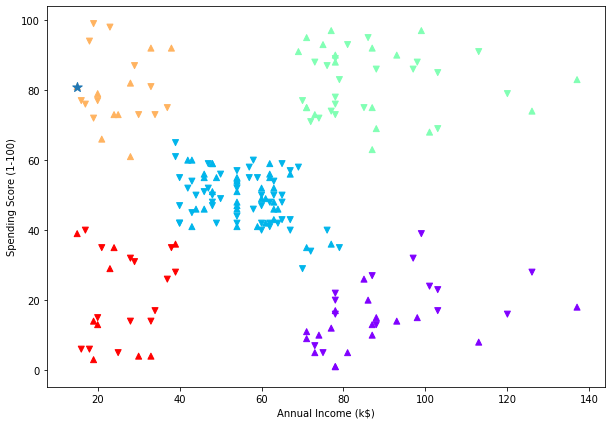

In [41]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
cluster.fit_predict(df_to_analyse)
customer_data['Labels']=cluster.labels_
plt.figure(figsize=(10, 7))
plt.scatter(customer_data[customer_data['Genre']=='Female']['Annual Income (k$)'], customer_data[customer_data['Genre']=='Female']['Spending Score (1-100)'], c=customer_data[customer_data['Genre']=='Female']['Labels'],marker="v" ,cmap='rainbow')
plt.scatter(customer_data[customer_data['Genre']=='Male']['Annual Income (k$)'], customer_data[customer_data['Genre']=='Male']['Spending Score (1-100)'], c=customer_data[customer_data['Genre']=='Male']['Labels'],marker="^" ,cmap='rainbow')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.scatter(customer_data[customer_data['CustomerID']==2]['Annual Income (k$)'], customer_data[customer_data['CustomerID']==2]['Spending Score (1-100)'],marker="*",s=100)